# Most Common Words in the CORD-19 Dataset

[CORD-19](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) is a resource of over 134,000 scholarly articles, including over 60,000 with full text, about COVID-19 and the coronavirus group. 

These are the most common words in the titles of the papers from the CORD-19 dataset. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import warnings 
warnings.filterwarnings('ignore')

def count_ngrams(dataframe,column,begin_ngram,end_ngram):
    # adapted from https://stackoverflow.com/questions/36572221/how-to-find-ngram-frequency-of-a-column-in-a-pandas-dataframe
    word_vectorizer = CountVectorizer(ngram_range=(begin_ngram,end_ngram), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(df['title'].dropna())
    frequencies = sum(sparse_matrix).toarray()[0]
    most_common = pd.DataFrame(frequencies, 
                               index=word_vectorizer.get_feature_names(), 
                               columns=['frequency']).sort_values('frequency',ascending=False)
    most_common['ngram'] = most_common.index
    most_common.reset_index()
    return most_common

def word_cloud_function(df,column,number_of_words):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=number_of_words,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

def word_bar_graph_function(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()
    
df = pd.read_csv('/kaggle/input/CORD-19-research-challenge/metadata.csv')  
three_gram = count_ngrams(df,'title',3,3)
words_to_exclude = ["my","to","at","for","it","the","with","from","would","there","or","if","it","but","of","in","as","and",'NaN','dtype']

# Most Common Words

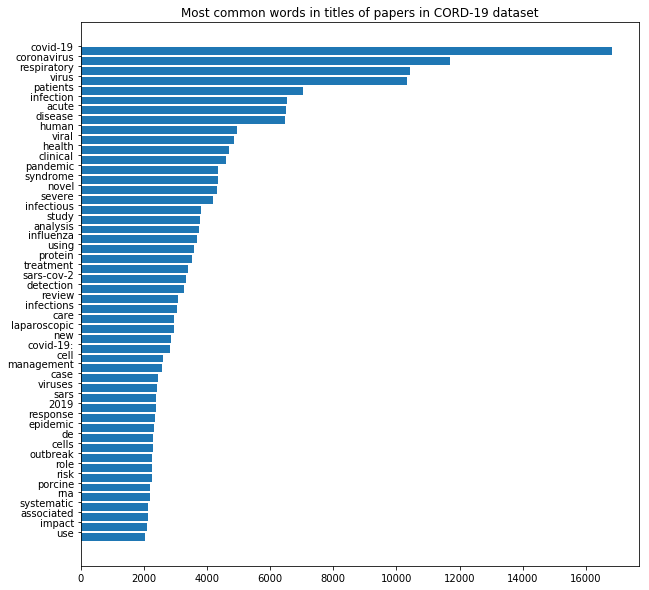

In [2]:
plt.figure(figsize=(10,10))
word_bar_graph_function(df,'title','Most common words in titles of papers in CORD-19 dataset')

In [3]:
fig = px.bar(three_gram.sort_values('frequency',ascending=False)[0:10], 
             x="frequency", 
             y="ngram",
             title='Most Common 3-Words in Titles of Papers in CORD-19 Dataset',
             orientation='h')
fig.show()

# Most Common Journals

In [4]:
value_counts = df['journal'].value_counts()
value_counts_df = pd.DataFrame(value_counts)
value_counts_df['journal_name'] = value_counts_df.index
value_counts_df['count'] = value_counts_df['journal']
fig = px.bar(value_counts_df[0:20], 
             x="count", 
             y="journal_name",
             title='Most Common Journals in CORD-19 Dataset',
             orientation='h')
fig.show()

In [5]:
# The contents of this code cell were adapted from
# https://www.kaggle.com/latimerb/cord-19-beginner-eda
df2 = pd.read_csv('/kaggle/input/CORD-19-research-challenge/metadata.csv')  
df2['publish_time'] = df2['publish_time'].str[:4]
all_years = df2['publish_time'].values.astype(str)
all_4_digit = []
for y in all_years:
    if len(y)==4:
        all_4_digit.append(y)
all_4_digit = np.array(all_4_digit)
[years,counts]=np.unique(all_4_digit.astype(int),return_counts=True)
raw_data = {'years': years, 
        'counts': counts}
df2 = pd.DataFrame(raw_data, columns = ['years', 'counts'])
fig = px.bar(df2.sort_values('years',ascending=False)[0:50], 
             x="counts", 
             y="years",
             title='Most Common Date of Publication in CORD-19 Dataset',
             orientation='h')
fig.show()

# Sample File and Sample Abstract

In [6]:
import json
file_path = '/kaggle/input/CORD-19-research-challenge/document_parses/pdf_json/252878458973ebf8c4a149447b2887f0e553e7b5.json'
with open(file_path) as json_file:
     json_file = json.load(json_file)
# Uncomment the line below to preview the entire full-text document
# json_file 

In [7]:
print(json_file['metadata']['title'])
print('\nAbstract: \n\n', json_file['abstract'])

Successful Treatment of Disseminated Nocardiosis Caused by Nocardia veterana in a Dog

Abstract: 

 [{'text': 'A 5-year-old male castrated Lhasa Apso cross was evaluated for a 1-month history of inappetence, lethargy, gagging, and progressive right thoracic limb lameness. Synovial fluid analysis revealed nonseptic suppurative inflammation, and a diagnosis of immune-mediated polyarthritis (IMPA) was made. After 3 months of treatment with prednisone and later cyclosporine, the dog developed multiple firm cutaneous and subcutaneous masses and a focal mass within the jejunum. Cultures of blood, urine, skin lesions, and the jejunal mass identified Nocardia veterana by matrix-absorption laser desorption ionization-time-of-flight mass spectrometry (MALDI-TOF MS) and allowed for earlier identification of the organism compared to more traditional secA1 gene sequencing. Immunosuppressive drug treatment was discontinued, and the dog was treated for 3 months by administration of trimethoprim-sulfa

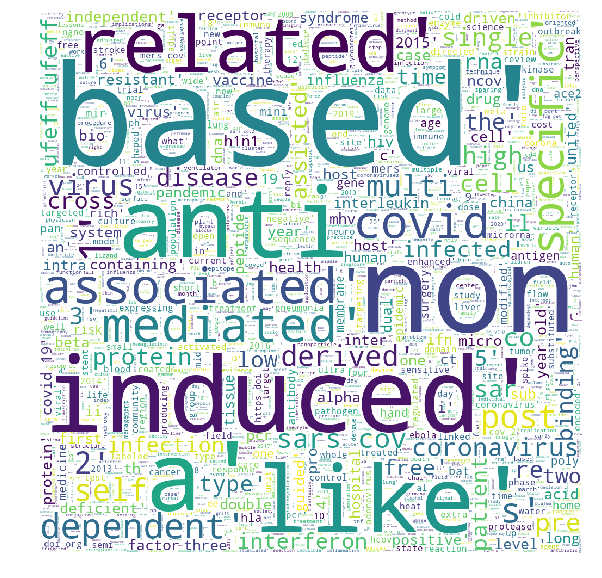

In [8]:
plt.figure(figsize=(10,10))
word_cloud_function(df,'title',50000)